In [1]:
import numpy as np
import pandas as pd

In [39]:
np.set_printoptions(precision=6)

In [2]:
df = pd.read_csv('../data/imobiliare_bucuresti.csv')

In [3]:
df

,Unnamed: 0,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou,Price/Surface,Price,WebPage
0,1,2,56.00,0,1,0,2,1,1,639.29,35800,https://www.imobiliare.ro/vanzare-apartamente/...
1,2,2,57.00,0,1,0,2,0,1,628.07,35800,https://www.imobiliare.ro/vanzare-apartamente/...
2,3,2,67.00,0,1,0,2,1,1,591.04,39600,https://www.imobiliare.ro/vanzare-apartamente/...
3,4,1,48.00,0,1,0,2,1,1,620.83,29800,https://www.imobiliare.ro/vanzare-garsoniere/b...
4,5,3,89.60,0,0,1,3,1,1,1260.04,112900,https://www.imobiliare.ro/vanzare-apartamente/...
...,...,...,...,...,...,...,...,...,...,...,...,...
9892,9894,4,90.00,0,0,1,8,0,0,944.44,85000,https://www.imobiliare.ro/vanzare-apartamente/...
9893,9895,3,85.00,0,0,1,8,1,0,1588.22,134999,https://www.imobiliare.ro/vanzare-apartamente/...
9894,9896,2,48.00,0,0,1,4,0,0,1229.17,59000,https://www.imobiliare.ro/vanzare-apartamente/...
9895,9897,4,83.81,0,0,1,3,1,1,1312.49,110000,https://www.imobiliare.ro/vanzare-apartamente/...


In [4]:
y_sqmp = df["Price/Surface"]
y_price = df['Price']
X = df.iloc[:,1:9]


In [5]:
X

,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou
0,2,56.00,0,1,0,2,1,1
1,2,57.00,0,1,0,2,0,1
2,2,67.00,0,1,0,2,1,1
3,1,48.00,0,1,0,2,1,1
4,3,89.60,0,0,1,3,1,1
...,...,...,...,...,...,...,...,...
9892,4,90.00,0,0,1,8,0,0
9893,3,85.00,0,0,1,8,1,0
9894,2,48.00,0,0,1,4,0,0
9895,4,83.81,0,0,1,3,1,1


In [6]:
y_price

0        35800
1        35800
2        39600
3        29800
4       112900
         ...  
9892     85000
9893    134999
9894     59000
9895    110000
9896     61500
Name: Price, Length: 9897, dtype: int64

In [ ]:
# further process X data maybe
# construct normal eq and determine model coefs (((XtX)^-1)Xt)y (y = x*w => w = y/x)
# validate results (how, when)
# f(X) = y = X[0]*w[0] + X[1]*w[1] + .... X[N]*w[N] +X[N+1]*w[N+1] | X[N+1] == 1

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Distribution of nr of rooms per apartment')

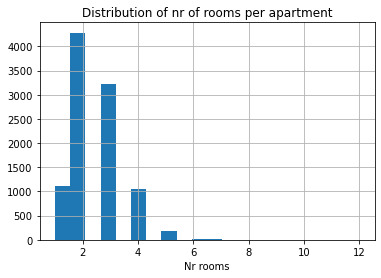

In [15]:
X['nr cam'].hist(bins=20)
plt.xlabel('Nr rooms')
plt.title('Distribution of nr of rooms per apartment')

Text(0.5, 1.0, 'Distribution of apartment surface')

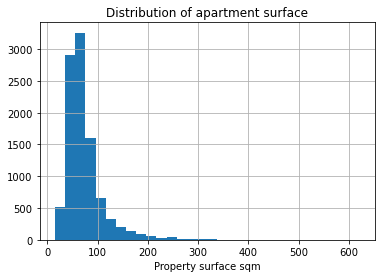

In [16]:
X['mp'].hist(bins=30)
plt.xlabel('Property surface sqm')
plt.title('Distribution of apartment surface')

(array([5.637e+03, 2.571e+03, 7.480e+02, 3.350e+02, 1.910e+02, 1.270e+02,
        7.100e+01, 3.600e+01, 5.000e+01, 2.500e+01, 8.000e+00, 6.000e+00,
        1.400e+01, 6.000e+00, 3.000e+00, 1.400e+01, 4.000e+00, 1.700e+01,
        2.000e+00, 1.000e+01, 2.000e+00, 2.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  18000.,   95240.,  172480.,  249720.,  326960.,  404200.,
         481440.,  558680.,  635920.,  713160.,  790400.,  867640.,
         944880., 1022120., 1099360., 1176600., 1253840., 1331080.,
        1408320., 1485560., 1562800., 1640040., 1717280., 1794520.,
        1871760., 1949000., 2026240., 2103480., 2180720., 2257960.,
        2335200., 2412440., 2489680.

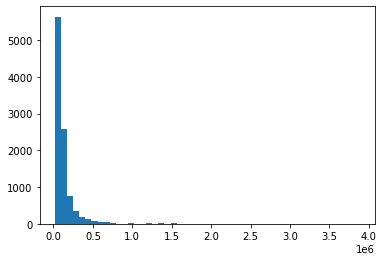

In [68]:
plt.hist(y_price.values, bins=50)

In [17]:
X.corr()

,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou
nr cam,1.000000,0.777186,0.003816,-0.067465,0.062328,0.073172,-0.000365,-0.139376
mp,0.777186,1.000000,0.000869,-0.056167,0.053421,0.065719,0.087754,0.006321
parter,0.003816,0.000869,1.000000,-0.285501,-0.388748,-0.448826,0.004277,-0.002453
et1-2,-0.067465,-0.056167,-0.285501,1.000000,-0.772008,-0.500485,0.065535,0.187789
et3+,0.062328,0.053421,-0.388748,-0.772008,1.000000,0.778814,-0.065839,-0.178905
etaj max,0.073172,0.065719,-0.448826,-0.500485,0.778814,1.000000,-0.071077,-0.193046
typ_decom,-0.000365,0.087754,0.004277,0.065535,-0.065839,-0.071077,1.000000,0.213843
bloc nou,-0.139376,0.006321,-0.002453,0.187789,-0.178905,-0.193046,0.213843,1.000000


In [18]:
new_corr_features = ['nr cam', 'mp', 'parter', 'et1-2', 'et3+','etaj max', 'typ_decom', 'bloc nou', 'Price']

In [19]:
df_new = df[new_corr_features]

In [20]:
df_new.corr()

,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou,Price
nr cam,1.000000,0.777186,0.003816,-0.067465,0.062328,0.073172,-0.000365,-0.139376,0.525333
mp,0.777186,1.000000,0.000869,-0.056167,0.053421,0.065719,0.087754,0.006321,0.770386
parter,0.003816,0.000869,1.000000,-0.285501,-0.388748,-0.448826,0.004277,-0.002453,-0.020806
et1-2,-0.067465,-0.056167,-0.285501,1.000000,-0.772008,-0.500485,0.065535,0.187789,-0.061217
et3+,0.062328,0.053421,-0.388748,-0.772008,1.000000,0.778814,-0.065839,-0.178905,0.072650
etaj max,0.073172,0.065719,-0.448826,-0.500485,0.778814,1.000000,-0.071077,-0.193046,0.091064
typ_decom,-0.000365,0.087754,0.004277,0.065535,-0.065839,-0.071077,1.000000,0.213843,0.034928
bloc nou,-0.139376,0.006321,-0.002453,0.187789,-0.178905,-0.193046,0.213843,1.000000,0.035021
Price,0.525333,0.770386,-0.020806,-0.061217,0.072650,0.091064,0.034928,0.035021,1.000000


In [21]:
X.mean()

nr cam        2.505709
mp           73.704865
parter        0.125695
et1-2         0.361827
et3+          0.512479
etaj max      3.336466
typ_decom     0.717591
bloc nou      0.593210
dtype: float64

In [22]:
X.min()

nr cam        1.0
mp           15.0
parter        0.0
et1-2         0.0
et3+          0.0
etaj max      0.0
typ_decom     0.0
bloc nou      0.0
dtype: float64

In [23]:
X.std()

nr cam        0.950467
mp           40.174869
parter        0.331522
et1-2         0.480553
et3+          0.499870
etaj max      2.818757
typ_decom     0.450194
bloc nou      0.491260
dtype: float64

In [24]:
X.max()

nr cam        12.0
mp           621.0
parter         1.0
et1-2          1.0
et3+           1.0
etaj max      18.0
typ_decom      1.0
bloc nou       1.0
dtype: float64

In [25]:
np_X = X.values

In [26]:
np_X

array([[ 2.  , 56.  ,  0.  , ...,  2.  ,  1.  ,  1.  ],
       [ 2.  , 57.  ,  0.  , ...,  2.  ,  0.  ,  1.  ],
       [ 2.  , 67.  ,  0.  , ...,  2.  ,  1.  ,  1.  ],
       ...,
       [ 2.  , 48.  ,  0.  , ...,  4.  ,  0.  ,  0.  ],
       [ 4.  , 83.81,  0.  , ...,  3.  ,  1.  ,  1.  ],
       [ 1.  , 35.  ,  0.  , ...,  4.  ,  1.  ,  1.  ]])

In [27]:
np_X.mean(axis=0)

array([ 2.5057088 , 73.70486511,  0.12569465,  0.36182682,  0.51247853,
        3.3364656 ,  0.71759119,  0.59321006])

In [28]:
np_X_n = (np_X - np_X.mean(0)) / np_X.std(0)

In [41]:
np_X_n

array([[-0.53209 , -0.440717, -0.379164, ..., -0.474157,  0.627337,
         0.828096],
       [-0.53209 , -0.415825, -0.379164, ..., -0.474157, -1.594041,
         0.828096],
       [-0.53209 , -0.1669  , -0.379164, ..., -0.474157,  0.627337,
         0.828096],
       ...,
       [-0.53209 , -0.639857, -0.379164, ...,  0.235412, -1.594041,
        -1.207589],
       [ 1.572244,  0.251541, -0.379164, ..., -0.119373,  0.627337,
         0.828096],
       [-1.584258, -0.963459, -0.379164, ...,  0.235412,  0.627337,
         0.828096]])

In [30]:
np_y = y_price.values
np_y_n = (np_y - np_y.min()) / (np_y.max() - np_y.min())
np_y_n

array([0.00460901, 0.00460901, 0.00559296, ..., 0.01061626, 0.02382185,
       0.01126359])

In [31]:
np_y.min()


18000

In [32]:
np_y.max()

3880000

In [62]:
y_norm_sub = np_y.min()
y_norm_div = np_y.max() - np_y.min()

In [49]:
np_weights = np.linalg.pinv(np_X_n.T.dot(np_X_n)).dot(np_X_n.T).dot(np_y_n)

In [50]:
np_weights

array([-8.675631e-03,  4.232360e-02, -3.350677e-05,  3.212204e-05,
        6.779467e-05,  2.016389e-03, -2.172465e-03,  1.009276e-03])

In [44]:
np_X_n

array([[-0.53209 , -0.440717, -0.379164, ..., -0.474157,  0.627337,
         0.828096],
       [-0.53209 , -0.415825, -0.379164, ..., -0.474157, -1.594041,
         0.828096],
       [-0.53209 , -0.1669  , -0.379164, ..., -0.474157,  0.627337,
         0.828096],
       ...,
       [-0.53209 , -0.639857, -0.379164, ...,  0.235412, -1.594041,
        -1.207589],
       [ 1.572244,  0.251541, -0.379164, ..., -0.119373,  0.627337,
         0.828096],
       [-1.584258, -0.963459, -0.379164, ...,  0.235412,  0.627337,
         0.828096]])

In [51]:
np_y_preds = np_X_n.dot(np_weights)

In [52]:
np_y_preds

array([-0.015534, -0.009654, -0.003945, ..., -0.019691, -0.003707,
       -0.02703 ])

(array([7.571e+03, 1.812e+03, 3.580e+02, 1.020e+02, 3.100e+01, 1.100e+01,
        5.000e+00, 4.000e+00, 1.000e+00, 2.000e+00]),
 array([-0.052363,  0.006143,  0.06465 ,  0.123156,  0.181663,  0.240169,
         0.298676,  0.357182,  0.415689,  0.474195,  0.532702]),
 <BarContainer object of 10 artists>)

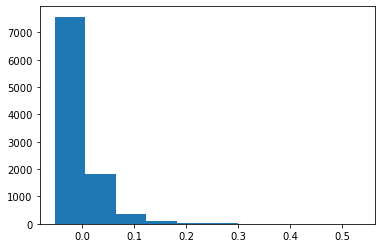

In [53]:
plt.hist(np_y_preds)

In [55]:
ones = np.ones(shape=(np_X_n.shape[0], 1))
ones

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [57]:
np_X_nb = np.concatenate((np_X_n, ones), axis=-1)
np_X_nb

array([[-0.53209 , -0.440717, -0.379164, ...,  0.627337,  0.828096,
         1.      ],
       [-0.53209 , -0.415825, -0.379164, ..., -1.594041,  0.828096,
         1.      ],
       [-0.53209 , -0.1669  , -0.379164, ...,  0.627337,  0.828096,
         1.      ],
       ...,
       [-0.53209 , -0.639857, -0.379164, ..., -1.594041, -1.207589,
         1.      ],
       [ 1.572244,  0.251541, -0.379164, ...,  0.627337,  0.828096,
         1.      ],
       [-1.584258, -0.963459, -0.379164, ...,  0.627337,  0.828096,
         1.      ]])

In [58]:
np_weights_b = np.linalg.pinv(np_X_nb.T.dot(np_X_nb)).dot(np_X_nb.T).dot(np_y_n)
np_weights_b

array([-0.008676,  0.042324,  0.000648,  0.000788,  0.000923,  0.002016,
       -0.002172,  0.001009,  0.030276])

In [59]:
np_y_preds2 = np_X_nb.dot(np_weights_b)
np_y_preds2

array([0.01461 , 0.02049 , 0.026199, ..., 0.010591, 0.026576, 0.003252])

(array([2.000e+01, 6.260e+02, 2.174e+03, 3.021e+03, 1.718e+03, 7.790e+02,
        4.300e+02, 2.720e+02, 1.960e+02, 1.460e+02, 1.070e+02, 9.800e+01,
        7.800e+01, 4.100e+01, 3.500e+01, 3.000e+01, 1.300e+01, 2.700e+01,
        1.500e+01, 1.600e+01, 1.100e+01, 1.300e+01, 4.000e+00, 2.000e+00,
        2.000e+00, 4.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-0.022219, -0.010515,  0.001189,  0.012893,  0.024597,  0.036301,
         0.048005,  0.059709,  0.071413,  0.083118,  0.094822,  0.106526,
         0.11823 ,  0.129934,  0.141638,  0.153342,  0.165046,  0.17675 ,
         0.188454,  0.200158,  0.211862,  0.223566,  0.235271,  0.246975,
         0.258679,  0.270383,  0.282087,  0.293791,  0.305495,  0.317199,
      

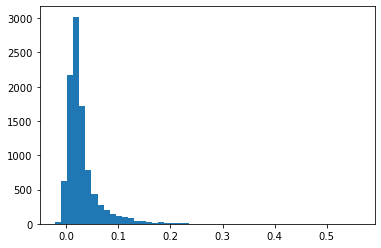

In [61]:
plt.hist(np_y_preds2, bins=50)

In [63]:
np_y_pred2_price = np_y_preds2 * y_norm_div + y_norm_sub
np_y_pred2_price

array([ 74425.079294,  97131.327476, 119181.464383, ...,  58904.358164,
       120634.851206,  30560.870476])

In [64]:
y_price

0        35800
1        35800
2        39600
3        29800
4       112900
         ...  
9892     85000
9893    134999
9894     59000
9895    110000
9896     61500
Name: Price, Length: 9897, dtype: int64

In [69]:
df_result = pd.DataFrame(
    {
        'GOLD' : y_price,
        'PRED' : np_y_pred2_price.round(0),
    }
)
df_result.head(10)

,GOLD,PRED
0,35800,74425.0
1,35800,97131.0
2,39600,119181.0
3,29800,77128.0
4,112900,179446.0
5,37400,111044.0
6,39500,40064.0
7,2350000,1087432.0
8,332000,261197.0
9,39900,126919.0


In [70]:
df_result.tail(10)

,GOLD,PRED
9887,47000,42872.0
9888,34500,-27332.0
9889,56000,29428.0
9890,101000,139525.0
9891,79524,88666.0
9892,85000,170337.0
9893,134999,166609.0
9894,59000,58904.0
9895,110000,120635.0
9896,61500,30561.0


In [72]:
abs_err = np.abs(y_price - np_y_pred2_price)
abs_err

0       38625.079294
1       61331.327476
2       79581.464383
3       47328.146545
4       66546.150310
            ...     
9892    85337.281779
9893    31610.149971
9894       95.641836
9895    10634.851206
9896    30939.129524
Name: Price, Length: 9897, dtype: float64

In [75]:
proc_err = abs_err / y_price
proc_err = proc_err * 100

In [77]:
df_result = pd.DataFrame(
    {
        'GOLD' : y_price,
        'PRED' : np_y_pred2_price.round(0),
        'ERR%' : proc_err.round(2)
    }
)
df_result.head(20)

,GOLD,PRED,ERR%
0,35800,74425.0,107.89
1,35800,97131.0,171.32
2,39600,119181.0,200.96
3,29800,77128.0,158.82
4,112900,179446.0,58.94
5,37400,111044.0,196.91
6,39500,40064.0,1.43
7,2350000,1087432.0,53.73
8,332000,261197.0,21.33
9,39900,126919.0,218.09


In [78]:
df_result.tail(20)

,GOLD,PRED,ERR%
9877,63000,59456.0,5.63
9878,32900,37746.0,14.73
9879,53490,49239.0,7.95
9880,79000,65093.0,17.60
9881,79900,110802.0,38.68
9882,149000,103109.0,30.80
9883,143000,154312.0,7.91
9884,55000,72024.0,30.95
9885,62860,66983.0,6.56
9886,27500,3890.0,85.85


In [79]:
proc_err.mean()

40.53357145062221

In [ ]:
# split the np_X_nb data into train observation and test observations
# train with NEQ
# present results